# Рубежный контроль №1 по ТМО
## Вариант 12
Кузнецов Григорий ИУ5-63Б

Задача №2, набор №4 - https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project (файл states_all.csv)

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

## Импорт библиотек

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
%matplotlib inline 
sns.set(style="ticks")

## Первичный анализ данных

In [65]:
data = pd.read_csv('states_all.csv')
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [66]:
data.shape

(1715, 25)

## Заполнение пропусков данных

In [67]:
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

Для обработки пропусков количественных данных выберем колонку 'GRADES_PK_G'

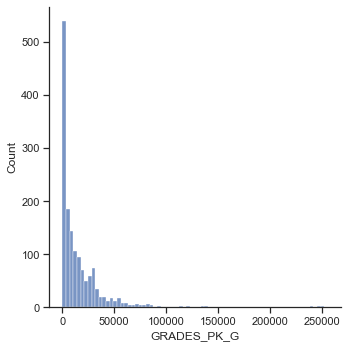

In [68]:
sns.displot(data['GRADES_PK_G'])

In [69]:
from sklearn.impute import SimpleImputer

def fill_data(strategy):
    imputer = SimpleImputer(strategy=strategy)
    new_data = imputer.fit_transform(data[['GRADES_PK_G']])
    sns.displot(new_data.transpose()[0])


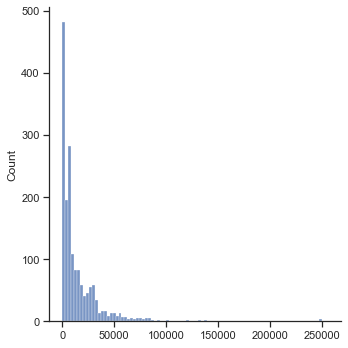

In [70]:
fill_data('median')

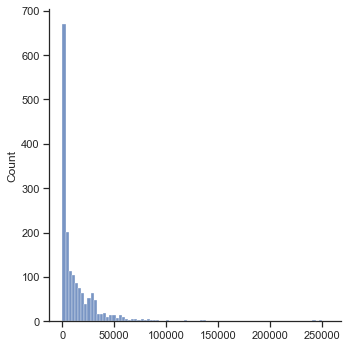

In [71]:
fill_data('most_frequent')

Не смотря на то, что при заполнении с помощью медианного способа появляется небольшой выброс, данная стратегия будет лучше, так как общая форма распределение сохраняется лучше. В отличе от модального заполнения, где график распределения сильно "вытягивается" в начале.

В данном датасете отсутствуют пропущенные значения категориальных признаков. Заполнение категориальных признаков происходит аналогично заполнению числовых признаков, с возможными стартегиями: заполнение константой или заполнение модальным (наиболее встречающимся значением).

## Дополнительное задание
Для произвольной колонки данных построить график "Ящик с усами (boxplot)"

<AxesSubplot:ylabel='GRADES_12_G'>

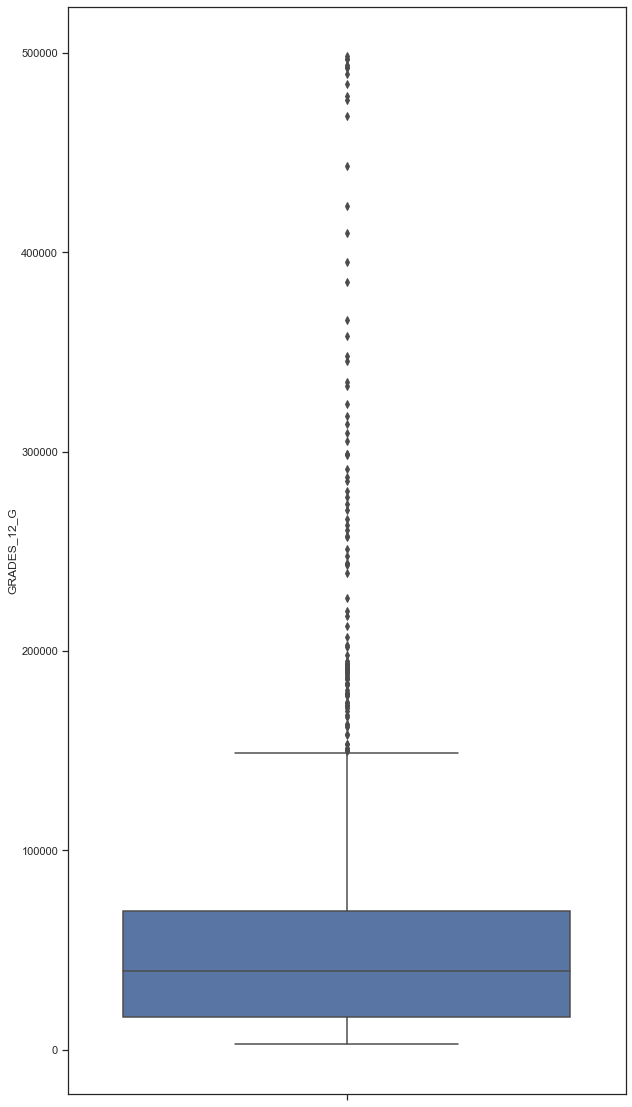

In [72]:
plt.subplots(figsize = (10,20))
sns.boxplot(data = data, y = 'GRADES_12_G')

Видно, что наибольшее количество значений попадает в предел ~2000 - ~7000. Не смотря на это, данная колонка содержит много выбросов.